### Loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

df1=pd.read_csv('Eyes-closed-EEG.csv')
df1.dropna(inplace=True)
df1.head(22)
#df1.head(20)
#df1.shape




,E1-1,Group & ID,FP1,AF3,FPZ,FP2,AF4,F7,F5,F3,...,PO7,PO5,PO3,POZ,PO4,PO6,PO8,O1,OZ,O2
1,Delta (AP),E1-1,1.343,1.343,1.343,1.343,1.343,1.343,1.343,2.075,...,2.319,2.319,2.075,2.075,1.465,2.075,2.319,1.465,2.319,1.465
2,Theta (AP),E1-1,3.662,3.662,3.662,3.662,3.662,3.662,3.662,3.662,...,5.981,4.639,7.202,7.202,7.202,4.761,4.761,4.761,4.761,4.761
3,Alpha1 (AP),E1-1,7.568,7.568,7.568,7.568,7.568,7.568,7.568,7.568,...,9.399,9.399,8.179,8.179,8.179,7.69,9.399,9.399,7.69,8.179
4,Alpha2 (AP),E1-1,11.475,11.475,11.475,11.841,11.841,11.841,11.841,11.841,...,11.719,11.719,11.963,11.963,11.841,11.597,11.719,11.719,11.719,11.841
5,Beta (AP),E1-1,11.963,11.963,11.963,12.207,12.207,11.963,11.963,11.963,...,11.963,11.963,11.963,11.963,11.963,11.963,11.963,11.963,11.963,11.963
6,Total (AP),E1-1,36.011,36.011,36.011,36.621,36.621,36.377,36.377,37.109,...,41.381,40.039,41.382,41.382,40.65,38.086,40.161,39.307,38.452,38.209
8,Delta(RP),E1-1,3.72941601177418,3.72941601177418,3.72941601177418,3.66729472160782,3.66729472160782,3.69189322923825,3.69189322923825,5.59163545231615,...,5.60402116913559,5.7918529433802,5.0142574066019,5.0142574066019,3.60393603936039,5.44819618757549,5.77425860909838,3.7270715139797,6.03089566212421,3.83417519432594
9,Theta(RP),E1-1,10.1691149926411,10.1691149926411,10.1691149926411,9.99972693263428,9.99972693263428,10.0668004508343,10.0668004508343,9.86822603681048,...,14.4534931490297,11.5862034516347,17.4037020926973,17.4037020926973,17.7170971709717,12.5006564091792,11.854784492418,12.1123464014043,12.3816706543223,12.4604150854511
10,Alpha1(RP),E1-1,21.0158007275555,21.0158007275555,21.0158007275555,20.6657382376232,20.6657382376232,20.8043543997581,20.8043543997581,20.3939745075319,...,22.7133225393296,23.4746122530533,19.7646319655889,19.7646319655889,20.1205412054121,20.1911463529906,23.4033017106148,23.9117714402015,19.998959742016,21.4059514774006
11,Alpha2(RP),E1-1,31.8652633917414,31.8652633917414,31.8652633917414,32.3339067748013,32.3339067748013,32.5507875855623,32.5507875855623,31.908701393193,...,28.3197602764554,29.2689627613077,28.9087042675559,28.9087042675559,29.1291512915129,30.4495090059339,29.1800502975524,29.8140280357188,30.4769582856548,30.990080870999


### 2.Dropping duplicate rows containing column names

In [2]:
column_names = df1.columns.tolist()
column_names

rows_to_drop = []  # Initialize a list to store indices of rows to drop

# Iterate through each row
for index, row in df1.iterrows():
  # Check if any value in the row is in the list of column names
  if any(value in column_names for value in row):
    rows_to_drop.append(index)  # Add the index of the row to rows_to_drop list

# Drop the identified rows
rows_to_drop
df1.drop(rows_to_drop, inplace=True)
df1.head(11)
#Reset index if needed
df1.reset_index(drop=True, inplace=True)
df1.head(22)



,E1-1,Group & ID,FP1,AF3,FPZ,FP2,AF4,F7,F5,F3,...,PO7,PO5,PO3,POZ,PO4,PO6,PO8,O1,OZ,O2
0,Delta (AP),E1-2,1.221,1.221,2.075,2.075,1.709,1.587,1.587,1.587,...,1.709,1.709,1.709,1.587,1.709,1.709,1.709,1.709,1.709,1.709
1,Theta (AP),E1-2,5.127,5.127,5.127,5.127,5.127,5.127,5.127,7.446,...,4.761,4.761,4.761,4.395,6.714,6.714,6.714,6.836,6.836,6.836
2,Alpha1 (AP),E1-2,8.423,8.789,8.423,8.423,8.789,8.789,8.789,8.789,...,9.399,9.399,10.01,10.01,10.01,10.01,10.01,9.766,9.766,9.766
3,Alpha2 (AP),E1-2,10.254,10.254,10.254,10.254,10.254,10.254,10.254,10.254,...,10.254,10.254,10.254,10.132,11.23,11.23,11.23,10.254,10.376,10.376
4,Beta (AP),E1-2,17.09,17.09,17.09,16.724,17.456,15.503,15.503,15.503,...,17.456,17.456,16.602,15.503,16.235,15.869,15.869,17.456,17.09,17.09
5,Total (AP),E1-2,42.115,42.481,42.969,42.603,43.335,41.26,41.26,43.579,...,43.579,43.579,43.336,41.627,45.898,45.532,45.532,46.021,45.777,45.777
6,Delta(RP),E1-2,2.89920455894574,2.87422612462042,4.82906281272545,4.87054902236932,3.94369447328949,3.84634028114397,3.84634028114397,3.64166226852383,...,3.92161362123959,3.92161362123959,3.94360347055566,3.81242943282005,3.72347378970761,3.75340419924449,3.75340419924449,3.71352208774255,3.73331585730826,3.73331585730826
7,Theta(RP),E1-2,12.1738098064823,12.0689249311457,11.9318578510089,12.0343637771988,11.8310834198685,12.4260785264178,12.4260785264178,17.0862112485371,...,10.9249868055715,10.9249868055715,10.9862470001846,10.5580512648041,14.6280883698636,14.7456733725731,14.7456733725731,14.8540883509702,14.933263429233,14.933263429233
8,Alpha1(RP),E1-2,20,20.6892493114569,19.6025041308851,19.7709081520081,20.2815276335526,21.3015026660204,21.3015026660204,20.1679708116295,...,21.5677275752082,21.5677275752082,23.0985785490124,24.046892641795,21.809229160312,21.9845383466573,21.9845383466573,21.2207470502597,21.3338576140857,21.3338576140857
9,Alpha2(RP),E1-2,24.3476196129645,24.1378498622914,23.8637157020177,24.0687275543976,23.6621668397369,24.8521570528357,24.8521570528357,23.5296817274375,...,23.5296817274375,23.5296817274375,23.6616208233339,24.3399716530137,24.4672970499804,24.6639725907054,24.6639725907054,22.2811325264553,22.6664045262905,22.6664045262905


In [3]:
df1.head(11)

,E1-1,Group & ID,FP1,AF3,FPZ,FP2,AF4,F7,F5,F3,...,PO7,PO5,PO3,POZ,PO4,PO6,PO8,O1,OZ,O2
0,Delta (AP),E1-2,1.221,1.221,2.075,2.075,1.709,1.587,1.587,1.587,...,1.709,1.709,1.709,1.587,1.709,1.709,1.709,1.709,1.709,1.709
1,Theta (AP),E1-2,5.127,5.127,5.127,5.127,5.127,5.127,5.127,7.446,...,4.761,4.761,4.761,4.395,6.714,6.714,6.714,6.836,6.836,6.836
2,Alpha1 (AP),E1-2,8.423,8.789,8.423,8.423,8.789,8.789,8.789,8.789,...,9.399,9.399,10.01,10.01,10.01,10.01,10.01,9.766,9.766,9.766
3,Alpha2 (AP),E1-2,10.254,10.254,10.254,10.254,10.254,10.254,10.254,10.254,...,10.254,10.254,10.254,10.132,11.23,11.23,11.23,10.254,10.376,10.376
4,Beta (AP),E1-2,17.09,17.09,17.09,16.724,17.456,15.503,15.503,15.503,...,17.456,17.456,16.602,15.503,16.235,15.869,15.869,17.456,17.09,17.09
5,Total (AP),E1-2,42.115,42.481,42.969,42.603,43.335,41.26,41.26,43.579,...,43.579,43.579,43.336,41.627,45.898,45.532,45.532,46.021,45.777,45.777
6,Delta(RP),E1-2,2.89920455894574,2.87422612462042,4.82906281272545,4.87054902236932,3.94369447328949,3.84634028114397,3.84634028114397,3.64166226852383,...,3.92161362123959,3.92161362123959,3.94360347055566,3.81242943282005,3.72347378970761,3.75340419924449,3.75340419924449,3.71352208774255,3.73331585730826,3.73331585730826
7,Theta(RP),E1-2,12.1738098064823,12.0689249311457,11.9318578510089,12.0343637771988,11.8310834198685,12.4260785264178,12.4260785264178,17.0862112485371,...,10.9249868055715,10.9249868055715,10.9862470001846,10.5580512648041,14.6280883698636,14.7456733725731,14.7456733725731,14.8540883509702,14.933263429233,14.933263429233
8,Alpha1(RP),E1-2,20,20.6892493114569,19.6025041308851,19.7709081520081,20.2815276335526,21.3015026660204,21.3015026660204,20.1679708116295,...,21.5677275752082,21.5677275752082,23.0985785490124,24.046892641795,21.809229160312,21.9845383466573,21.9845383466573,21.2207470502597,21.3338576140857,21.3338576140857
9,Alpha2(RP),E1-2,24.3476196129645,24.1378498622914,23.8637157020177,24.0687275543976,23.6621668397369,24.8521570528357,24.8521570528357,23.5296817274375,...,23.5296817274375,23.5296817274375,23.6616208233339,24.3399716530137,24.4672970499804,24.6639725907054,24.6639725907054,22.2811325264553,22.6664045262905,22.6664045262905


In [4]:
df1['group_id'] = df1['Group & ID'].str.extract(r'E(\d+)-')

# Displaying the DataFrame with the new 'group_id' column
dfc = df1.iloc[:, 2:]
df1.head(5)

,E1-1,Group & ID,FP1,AF3,FPZ,FP2,AF4,F7,F5,F3,...,PO5,PO3,POZ,PO4,PO6,PO8,O1,OZ,O2,group_id
0,Delta (AP),E1-2,1.221,1.221,2.075,2.075,1.709,1.587,1.587,1.587,...,1.709,1.709,1.587,1.709,1.709,1.709,1.709,1.709,1.709,1
1,Theta (AP),E1-2,5.127,5.127,5.127,5.127,5.127,5.127,5.127,7.446,...,4.761,4.761,4.395,6.714,6.714,6.714,6.836,6.836,6.836,1
2,Alpha1 (AP),E1-2,8.423,8.789,8.423,8.423,8.789,8.789,8.789,8.789,...,9.399,10.01,10.01,10.01,10.01,10.01,9.766,9.766,9.766,1
3,Alpha2 (AP),E1-2,10.254,10.254,10.254,10.254,10.254,10.254,10.254,10.254,...,10.254,10.254,10.132,11.23,11.23,11.23,10.254,10.376,10.376,1
4,Beta (AP),E1-2,17.09,17.09,17.09,16.724,17.456,15.503,15.503,15.503,...,17.456,16.602,15.503,16.235,15.869,15.869,17.456,17.09,17.09,1


In [5]:
count_group_1 = (df1['group_id'] == '1').sum()
count_group_2 = (df1['group_id'] == '2').sum()
count_group_3 = (df1['group_id'] == '3').sum()

# Displaying the count of 'group_id' 1
print("Number of people in 'Group & ID' belonging to 'group_id' 1:", count_group_1/11)
print("Number of people in 'Group & ID' belonging to 'group_id' 2:", count_group_2/11)
print("Number of people in 'Group & ID' belonging to 'group_id' 3:", count_group_3/11)

Number of people in 'Group & ID' belonging to 'group_id' 1: 29.0
Number of people in 'Group & ID' belonging to 'group_id' 2: 27.0
Number of people in 'Group & ID' belonging to 'group_id' 3: 28.0


In [6]:
from tensorflow.keras.utils import to_categorical
df1.shape
df1_input=df1.iloc[:,2:]
df1_input.head(11)
x=df1_input.iloc[:,:-1].values
x=x.reshape(84,11,60,1)
y=pd.read_csv('Participant-characteristics.csv')
y=y.iloc[1:,1:2].values
from tensorflow.keras.utils import to_categorical

# Convert labels to categorical (one-hot encoding)
y = to_categorical(y - 1,num_classes=3)  # Subtracting 1 to make classes start from 0

# Reshape x for CNN input
x = x.reshape(84, 11, 60, 1)


print(type(y[0,0]))
x=x.astype(np.float)




<class 'numpy.float32'>


<ipython-input-6-d7171f357c89>:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=x.astype(np.float)


In [7]:
x=x.astype(np.float)

<ipython-input-7-c66da2529367>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x=x.astype(np.float)


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xreshaped = x.reshape(-1, 60)  # Reshape to (84 * 11, 60)

# Scale the data using Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xreshaped)

# Reshape back to original shape
x_scaled = scaled_data.reshape(84, 11, 60)
x_scaled.shape

(84, 11, 60)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2)


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Dense, Flatten,LSTM
cnn_model=Sequential(
    [
        Conv2D(5,(3,3),padding='same',activation='relu',input_shape=(11,60,1)),
        MaxPooling2D((2,2)),

        Conv2D(5,(3,3),activation='relu'),
        MaxPooling2D((2,2)),

        Flatten(),
        Dense(60,activation='relu'),
        Dense(3,activation='softmax')
    ]
                 )




In [30]:
cnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_model.fit(x_train,y_train,epochs=100,batch_size=1)

Epoch 1/100
67/67 [==============================] - 1s 2ms/step - loss: 0.1073 - accuracy: 0.9701
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9851
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0661 - accuracy: 0.9851
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9701
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0615 - accuracy: 0.9851
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0699 - accuracy: 0.9851
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0823 - accuracy: 0.9701
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9701
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1004 - accuracy: 0.9851
Epoch 10/100
67/67 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9701
Epoch 11/

In [31]:
cnn_model.evaluate(x_test,y_test)
y_test.shape

1/1 [==============================] - 0s 148ms/step - loss: 4.7008 - accuracy: 0.7059


(17, 3)

**CNN Output Visualized**

1/1 [==============================] - 0s 72ms/step
Cnn:  0.7058823529411765


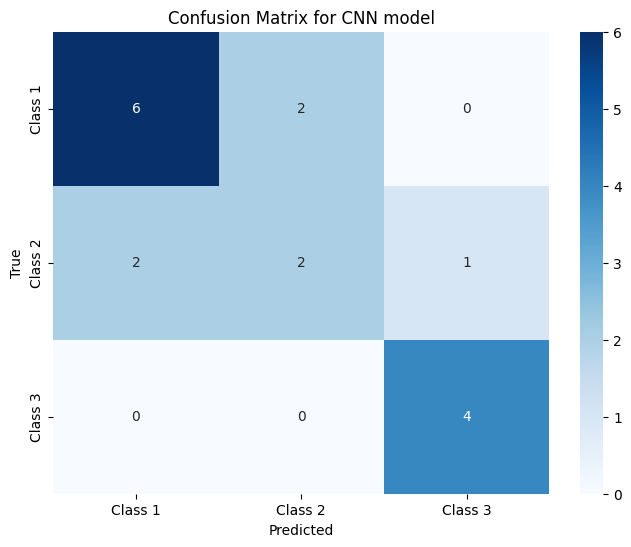

CNN Precision: 0.6882352941176471
CNN Recall: 0.7058823529411765
CNN F1-Score: 0.6928104575163399


In [32]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
#xpred=x_test.reshape(x_test.shape[0],11,60,1)
ypred=cnn_model.predict(x_test)
nypred=ypred.reshape(17,3)
ypred=np.argmax(nypred, axis=1).reshape(17,1)
ytest=np.argmax(y_test, axis=1)
m1accuracy = accuracy_score(ytest, ypred)
print("Cnn: ",m1accuracy)#m1:cnn/m2:cnn+lstm/m3:knn
conf_matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN model')
plt.show()

m1precision = precision_score(ytest, ypred, average='weighted')
m1recall = recall_score(ytest, ypred, average='weighted')
m1f1 = f1_score(ytest, ypred, average='weighted')

print("CNN Precision:", m1precision)
print("CNN Recall:", m1recall)
print("CNN F1-Score:", m1f1)

### LSTM


In [14]:
import numpy as np
import pandas as pd
from tensorflow.keras.layers import LSTM,Dense,Flatten,Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split as TTS


In [15]:
#preprocessing
new_df=df1.iloc[:,2:-1]
lstm_df=new_df.values.reshape(84, -1)
lstm_df=lstm_df.astype(float)

lx=np.array(new_df.iloc[:].values,dtype='float')
ly=np.array(df1.iloc[:,-1].values,dtype='float')
df2=pd.read_csv('Participant-characteristics.csv')
df2=df2.iloc[1:,1:2].values
xlstm=lx.reshape((lx.shape[0],lx.shape[1],1))
xlstm.shape
ylstm=ly.reshape((924,1,1))

xlstm=lstm_df
ylstm=df2
X=xlstm.reshape(xlstm.shape[0],xlstm.shape[1],1)
#y=ylstm.reshape(ylstm.shape[0],ylstm.shape[1],1)
#Y=to_categorical(ylstm)

xtrain,xtest,ytrain,ytest=TTS(X,ylstm,test_size=0.2,random_state=0)
print(X.shape)
print(ylstm.shape)


(84, 660, 1)
(84, 1)


### LSTM Model

In [16]:
model=Sequential()
model.add(LSTM(5,activation='relu',return_sequences=True,input_shape=(660,1)))
model.add(LSTM(5,activation='relu'))
model.add(Dense(3,activation='softmax'))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(xtrain,ytrain-1,epochs=10)

Epoch 1/10
3/3 [==============================] - 5s 408ms/step - loss: 1.3828 - accuracy: 0.3433
Epoch 2/10
3/3 [==============================] - 1s 316ms/step - loss: 1.2760 - accuracy: 0.3433
Epoch 3/10
3/3 [==============================] - 1s 322ms/step - loss: 1.2184 - accuracy: 0.3582
Epoch 4/10
3/3 [==============================] - 1s 323ms/step - loss: 1.1745 - accuracy: 0.3433
Epoch 5/10
3/3 [==============================] - 1s 314ms/step - loss: 1.1450 - accuracy: 0.3284
Epoch 6/10
3/3 [==============================] - 1s 319ms/step - loss: 1.1294 - accuracy: 0.3433
Epoch 7/10
3/3 [==============================] - 1s 313ms/step - loss: 1.1184 - accuracy: 0.3433
Epoch 8/10
3/3 [==============================] - 1s 327ms/step - loss: 1.1120 - accuracy: 0.3433
Epoch 9/10
3/3 [==============================] - 1s 320ms/step - loss: 1.1065 - accuracy: 0.3433
Epoch 10/10
3/3 [==============================] - 1s 321ms/step - loss: 1.1045 - accuracy: 0.3433


## CNN+LSTM

### **Pre-Processing**

In [44]:
dtr=pd.read_csv('train.csv')
dts=pd.read_csv('test1.csv')
xtrain=dtr.iloc[:,3:-1]
xtest=dts.iloc[:,3:-1]
df2=pd.read_csv('Participant-characteristics.csv')
ytrain=df2.iloc[1:85,1:2]
rows_1_to_7 = df2.iloc[1:8, 1:2]
rows_30_to_34 = df2.iloc[30:35, 1:2]
rows_57_to_62 = df2.iloc[57:63, 1:2]
ytest = pd.concat([rows_1_to_7, rows_30_to_34, rows_57_to_62], ignore_index=True)
xtest.shape




(198, 60)

In [45]:
#-----------Code for Scaling-------------------------
#xshaped = xtrain.reshape(-1, 60)  # Reshape to (84 * 11, 60)

# Scale the data using Standardization
scaler = StandardScaler()
xtr_scaled= scaler.fit_transform(xtrain)
xts_scaled= scaler.fit_transform(xtest)

# Reshape back to original shape
xtr_scaled = xtr_scaled.reshape(84, 11, 60)
xts_scaled = xts_scaled.reshape(18, 11, 60)
#------------------End------------------------

In [46]:
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import Input,TimeDistributed as TD
from tensorflow.keras.optimizers import Adam



xtr_scaled=xtr_scaled.reshape(84,11,60,1)
xts_scaled=xts_scaled.reshape(18,11,60,1)
#xtrain,xtest,ytrain,ytest=TTS(x_scaled,ylstm,test_size=0.2,random_state=42)

model=Sequential()
model.add(Conv2D(35, (3, 3), padding='same',activation='relu', input_shape=(11, 60,1)))#added TD()
#model.add(Conv2D(5, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((3, 3)))

model.add(Conv2D(35, (2, 2)))
model.add(MaxPooling2D((2, 2)))


model.add(TD(Flatten()))

model.add(LSTM(60, activation='relu', return_sequences=True))
#model.add(LSTM(45, activation='relu'))


model.add(Dense(3, activation='softmax'))
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer=Adam(learning_rate=0.01), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xtr_scaled, ytrain-1, epochs=100)

Epoch 1/100
3/3 [==============================] - 2s 17ms/step - loss: 1.2394 - accuracy: 0.3095
Epoch 2/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1646 - accuracy: 0.3214
Epoch 3/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1072 - accuracy: 0.3333
Epoch 4/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1126 - accuracy: 0.3571
Epoch 5/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0957 - accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 0s 15ms/step - loss: 1.1021 - accuracy: 0.3452
Epoch 7/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0962 - accuracy: 0.3452
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 1.0919 - accuracy: 0.3571
Epoch 9/100
3/3 [==============================] - 0s 15ms/step - loss: 1.0921 - accuracy: 0.3214
Epoch 10/100
3/3 [==============================] - 0s 16ms/step - loss: 1.0913 - accuracy: 0.3452
Epoch 11/100
3/3 [=

In [26]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 11, 60, 35)        350       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 20, 35)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 19, 35)         4935      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 1, 9, 35)          0         
 g2D)                                                            
                                                                 
 time_distributed (TimeDist  (None, 1, 315)            0         
 ributed)                                                        
                                                      

**Paper based cnn-lstm**

**CNN-LSTM Output Visualized**

1/1 [==============================] - 0s 207ms/step
Cnn-lstm 1.0


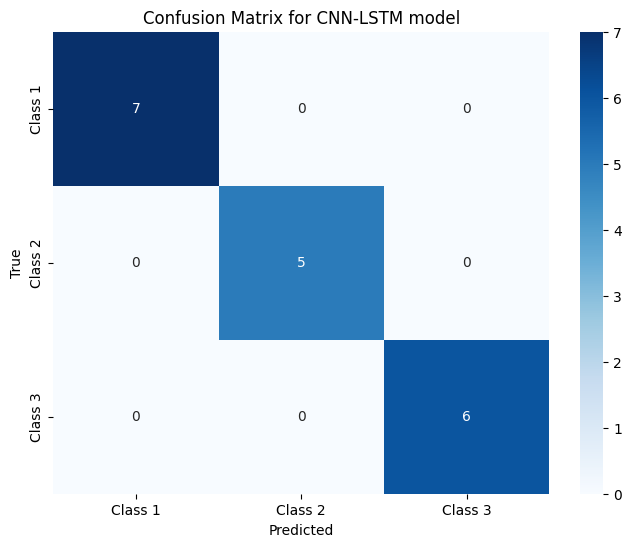

CNN Precision: 1.0
CNN Recall: 1.0
CNN F1-Score: 1.0


In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
xpred=xts_scaled.reshape(18,11,60,1)
ypred=model.predict(xpred)
nypred=ypred.reshape(18,3)
ypred=np.argmax(nypred, axis=1).reshape(18,1)
m2accuracy = accuracy_score(ytest-1, ypred)
print("Cnn-lstm",m2accuracy)#m1:cnn/m2:cnn+lstm/m3:knn
conf_matrix = confusion_matrix(ytest-1, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for CNN-LSTM model')
plt.show()

m2precision = precision_score(ytest-1, ypred, average='weighted')
m2recall = recall_score(ytest-1, ypred, average='weighted')
m2f1 = f1_score(ytest-1, ypred, average='weighted')

print("CNN Precision:", m2precision)
print("CNN Recall:", m2recall)
print("CNN F1-Score:", m2f1)

In [21]:
print(ypred)
ytest = ytest.astype(float)
ytest-1


[[2]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [2]
 [2]
 [2]
 [2]]


,Group
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,1.0
9,1.0


### KNN

In [33]:
#preprocessing
from sklearn.model_selection import train_test_split as TTS
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score
new_df=df1.iloc[:,2:-1]
X=new_df.values.reshape(84, -1)
X=lstm_df.astype(float)
df2=pd.read_csv('Participant-characteristics.csv')
Y=df2.iloc[1:,1:2].values

xtrain,xtest,ytrain,ytest=TTS(X,Y,test_size=0.2)


### KNN Model

In [34]:
knn = KNN(n_neighbors=3)
knn.fit(xtrain, ytrain)
ypred = knn.predict(xtest)
accuracy_score(ytest-1, ytest)
ypred=ypred.reshape(17,1)
print(xtest.shape)
print(xtrain.shape)

(17, 660)
(67, 660)


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


 **KNN Output Visualized**

KNN accuracy 0.47058823529411764


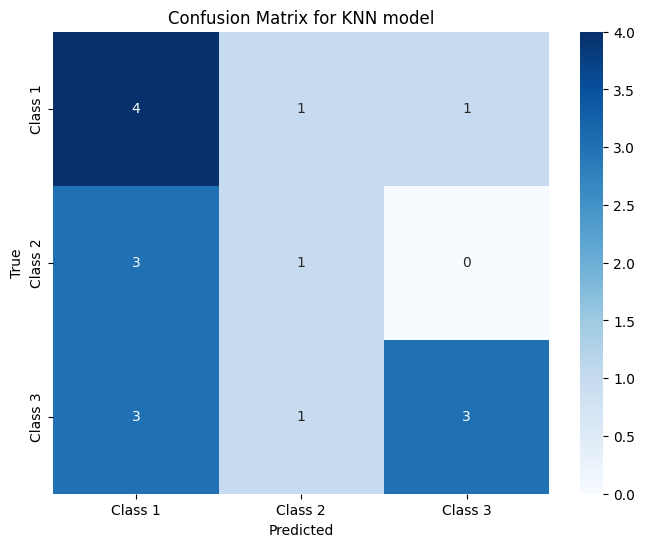

CNN Precision: 0.5284313725490196
CNN Recall: 0.47058823529411764
CNN F1-Score: 0.46829640947288004


In [35]:
m3accuracy = accuracy_score(ytest, ypred)
print("KNN accuracy",m3accuracy)#m1:cnn/m2:cnn+lstm/m3:knn
conf_matrix = confusion_matrix(ytest, ypred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 1', 'Class 2', 'Class 3'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for KNN model')
plt.show()

m3precision = precision_score(ytest, ypred, average='weighted')
m3recall = recall_score(ytest, ypred, average='weighted')
m3f1 = f1_score(ytest, ypred, average='weighted')

print("CNN Precision:", m3precision)
print("CNN Recall:", m3recall)
print("CNN F1-Score:", m3f1)

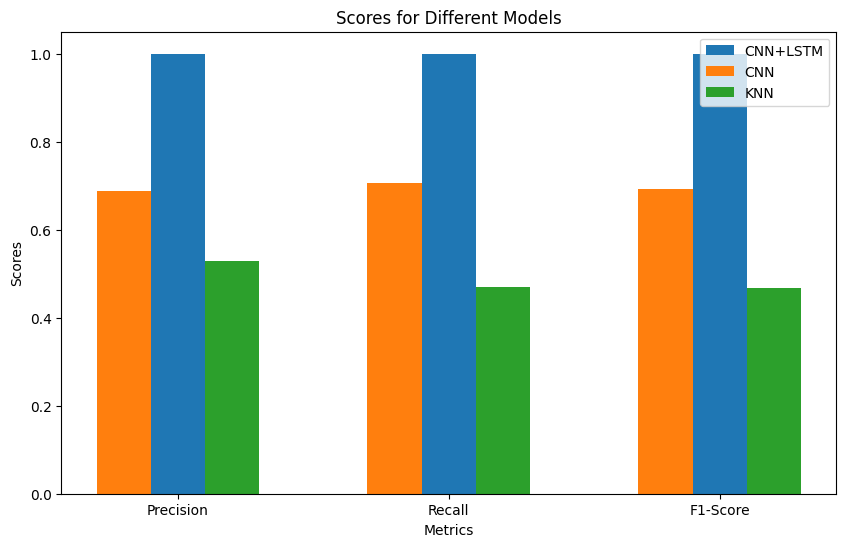

In [49]:
import matplotlib.pyplot as plt

# Replace these with your actual scores for each model
cnn_scores = [m1precision, m1recall, m1f1]
cnn_lstm_scores = [m2precision, m2recall, m2f1]
knn_scores = [m3precision, m3recall, m3f1]

# Labels for the scores
labels = ['Precision', 'Recall', 'F1-Score']

# Plotting bar plots for each model's scores
x = range(len(labels))

plt.figure(figsize=(10, 6))

# CNN+LSTM model scores
plt.bar(x, cnn_lstm_scores, width=0.2, label='CNN+LSTM')

# CNN model scores
plt.bar([i - 0.2 for i in x], cnn_scores, width=0.2, label='CNN')

# KNN model scores
plt.bar([i + 0.2 for i in x], knn_scores, width=0.2, label='KNN')


# Adding labels and title
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Scores for Different Models')
plt.xticks(x, labels)
plt.legend()
plt.show()
